#1.Define Problem Statement and perform Exploratory Data Analysis

##Yulu Case Study


In [73]:
#import essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
from datetime import datetime

**Importing the Yulu Data from google cloud to notebook**

In [3]:
#!wget "https://drive.google.com/uc?export=download&id=1-qDO7oNwzQn0RV44YtpqWdYS4SO3GkQg" -O Yulu_data.csv
!wget "https://drive.google.com/uc?export=download&id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i" -O Yulu_data.csv

--2025-02-04 02:45:01--  https://drive.google.com/uc?export=download&id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i
Resolving drive.google.com (drive.google.com)... 172.217.204.139, 172.217.204.102, 172.217.204.113, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i&export=download [following]
--2025-02-04 02:45:01--  https://drive.usercontent.google.com/download?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.204.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [application/octet-stream]
Saving to: ‘Yulu_data.csv’

Yulu_data.csv       100%[===================>] 633.16K  --.-

In [4]:
#Read csv dataset

data=pd.read_csv('Yulu_data.csv')

In [5]:
#display data to verify
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
#create another copy of data, so that original data would not change while manupulating data.
df=data.copy()

**Find the all columns name from Yulu dataset**

In [7]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

**Find the total number of rows and columns**

In [8]:
df.shape

(10886, 12)

* The tol numbe rof columns are 10886 and total rows are 12

**Find the null values if any available in dataset**

In [9]:
df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


* there is no null values available in Yulu dataset

**find the data types of the all columns**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


**Check any duplicate values**

In [11]:
print("If any duplicate values in dataset :", np.any(df.duplicated()))

If any duplicate values in dataset : False


In [12]:
#convert data type of datetime column from object to datattime64
df['datetime']=df['datetime'].astype('datetime64[ns]')

**Describe the basic statistical information about the data**

In [13]:
df.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


- Describe actually help us to find the statistical information of given columns like count,mean,min,max,percentile standard deviation of the perticuler columns.
- For e.g. the total count of rows of all the columns is 10886
- For **temp** column the minimum temperature is 0.82, max temerature is 45.456,average temperature is  20.23.standard deviation of temp column is 7.79.
- The 25th percentile(Q1),25% of the data points are below the value13.94 in temp column.  
- The 50th percentile(Q2),50% of the data points are below the value 20.5 in temp column.
- The 75th percentile(Q3),75% of the data points are below the value 26.24 in temp column.



In [14]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


**Continuous univariate distribution**

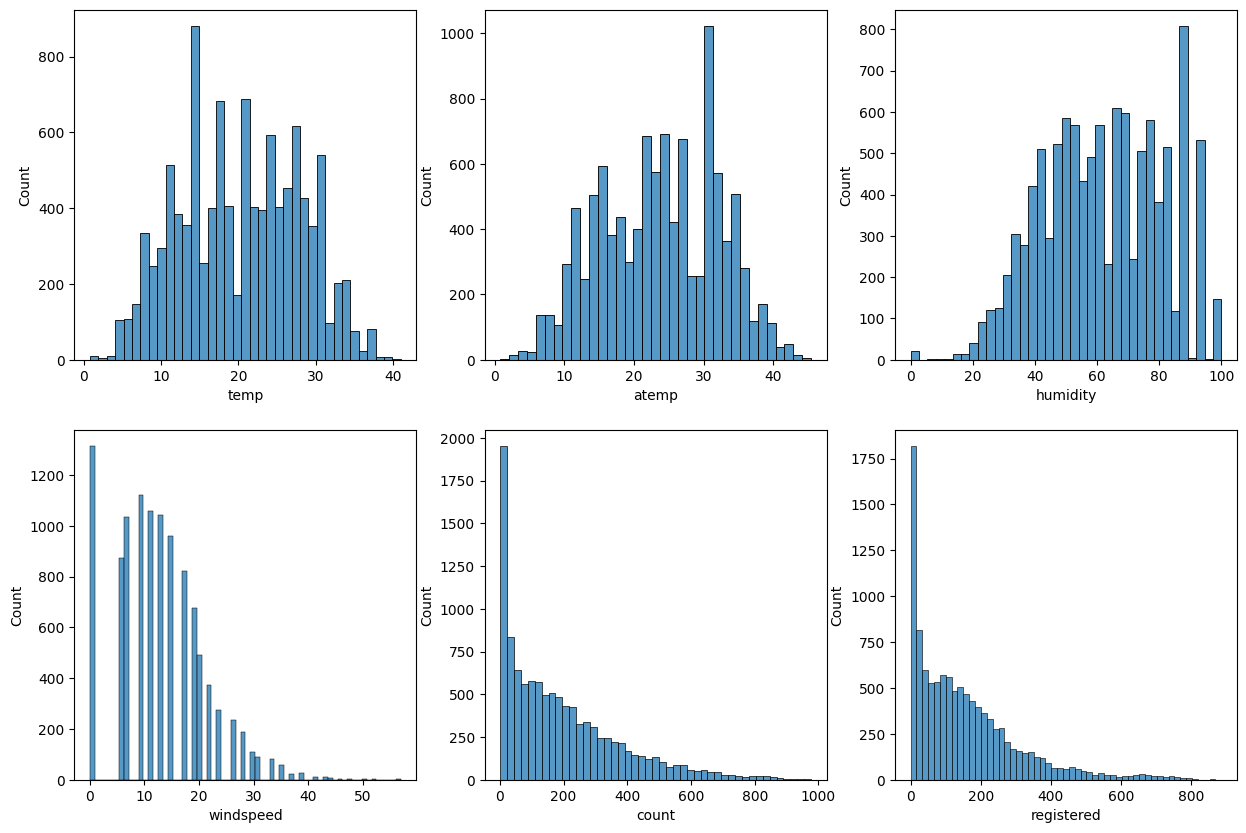

In [15]:
fig,axis=plt.subplots(2,3,figsize=(15,10))
sns.histplot(data=df,x=df['temp'],ax=axis[0,0])
sns.histplot(data=df,x=df['atemp'],ax=axis[0,1])
sns.histplot(data=df,x=df['humidity'],ax=axis[0,2])
sns.histplot(data=df,x=df['windspeed'],ax=axis[1,0])
sns.histplot(data=df,x=df['count'],ax=axis[1,1])
sns.histplot(data=df,x=df['registered'],ax=axis[1,2])
plt.show()


- the most use of bycycles in the range of tempeature is 10-30
- same for the atemp range of most rented bicyclke is 10-35.



Column Profiling:
- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
1. Clear, Few clouds, partly cloudy, partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [16]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

**converting holiday and season column values into meaningful data**

In [17]:
df['season1']=df['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
df['holiday1']=df['holiday'].map({1:'holiday',0:'workingday'})

**Categorical bivarient or multivarient distribution**

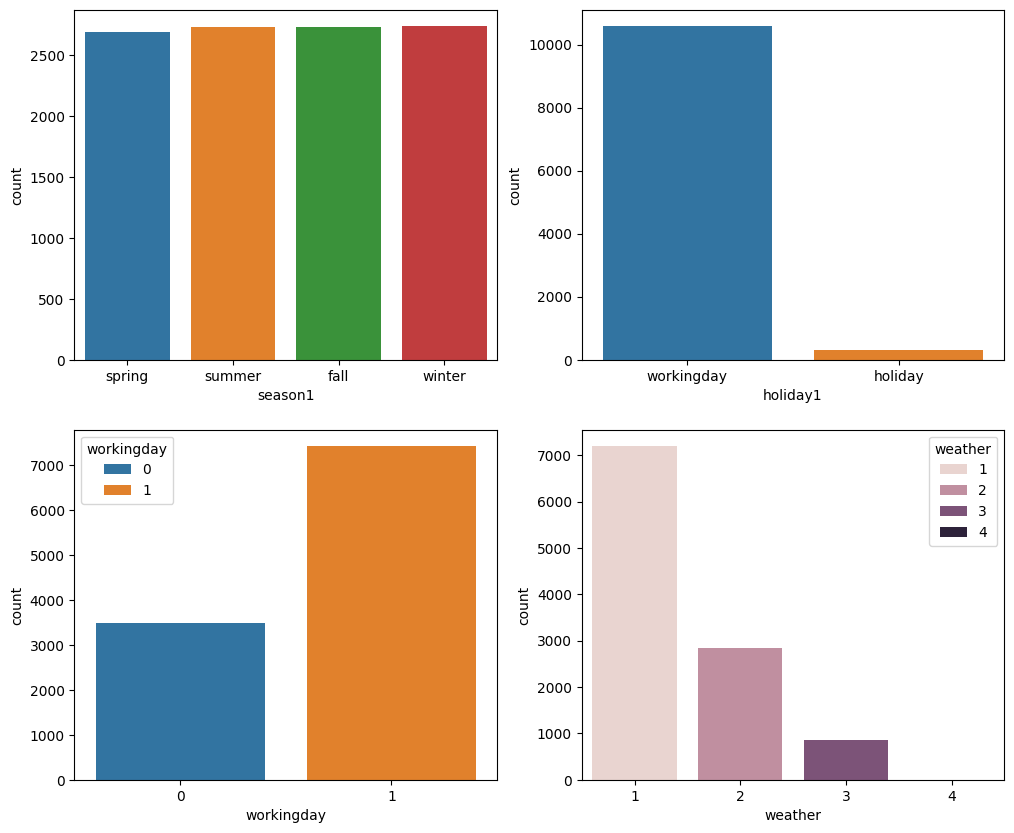

In [18]:
fig,axis=plt.subplots(2,2,figsize=(12,10))
sns.countplot(data=df,x=df['season1'],ax=axis[0,0],hue=df['season1'])
sns.countplot(data=df,x=df['holiday1'],ax=axis[0,1],hue=df['holiday1'])
sns.countplot(data=df,x=df['workingday'],ax=axis[1,0],hue=df['workingday'])
sns.countplot(data=df,x=df['weather'],ax=axis[1,1],hue=df['weather'])
plt.show()

- in the season plot all the rented cycle count are same.
- In holiday we can understand that number uses of rented are more in working days and less in holiday.

**Weather :**
1. Clear, Few clouds, partly cloudy, partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + 4.4.Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- The more number of rented cycles are in weather 1 (Clear, Few clouds, partly cloudy, partly cloudy)

**Check for Outliers and deal with them accordingly**

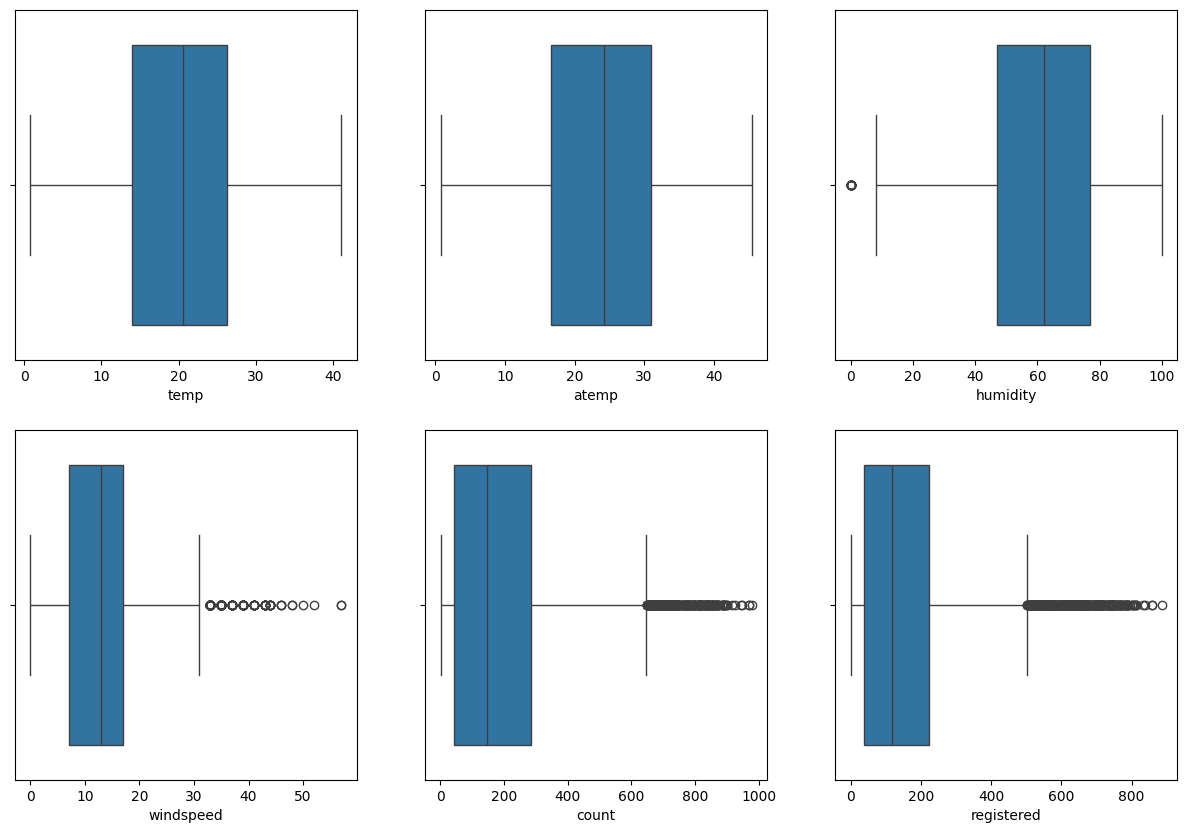

In [19]:
fig,axis=plt.subplots(2,3,figsize=(15,10))
sns.boxplot(data=df,x=df['temp'],ax=axis[0,0])
sns.boxplot(data=df,x=df['atemp'],ax=axis[0,1])
sns.boxplot(data=df,x=df['humidity'],ax=axis[0,2])
sns.boxplot(data=df,x=df['windspeed'],ax=axis[1,0])
sns.boxplot(data=df,x=df['count'],ax=axis[1,1])
sns.boxplot(data=df,x=df['registered'],ax=axis[1,2])
plt.show()

- As per the above plots we can understand the that there is no outlier in temp and atemp columns.
- In humidity column there a outlier at left side.
- There are so many outliers in windspeed,count and registered columns at right sides.

**Lets find out the outlier value in humanity column with the help of Inter Quartile Range(IQR)**

In [20]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season1,holiday1
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,spring,workingday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,spring,workingday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,spring,workingday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,spring,workingday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,spring,workingday


In [21]:
#Calculate quantiles
q1=df['humidity'].quantile(0.25)
q3=df['humidity'].quantile(0.75)
IQR=q3-q1

#Calculate upper and lower bound
upper_bound=q3+1.5*IQR
lower_bound=q1-1.5*IQR
print(upper_bound,lower_bound)

#Find out outlier value below the lower bound and above the upper bound
outliers=df["humidity"][(df["humidity"]<lower_bound)|(df['humidity'])>upper_bound]
print('outliers',outliers)

#removing the ourliers and storing it it  in humidity_no_outlier column
df['humidity_no_outlier']=df['humidity'][(df['humidity']>lower_bound) & (df['humidity']<upper_bound)]

122.0 2.0
outliers Series([], Name: humidity, dtype: int64)


**outlier value is zero '0' in humidity column**

Displaying humidity column with or without outliers


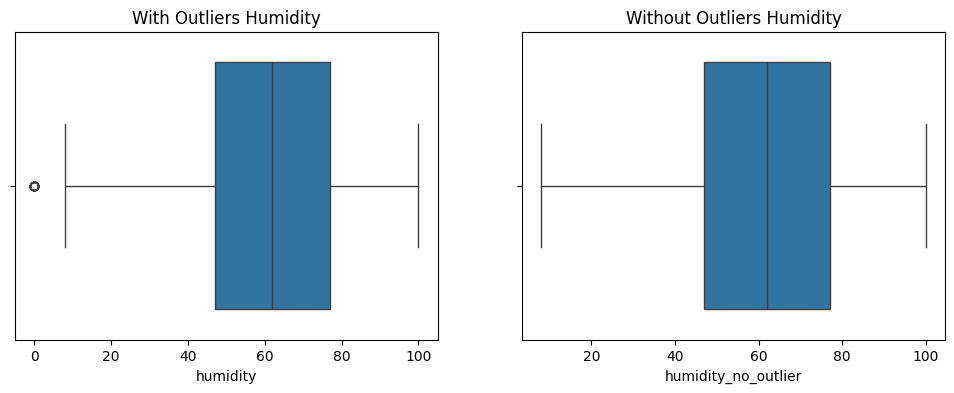

In [22]:
print('Displaying humidity column with or without outliers')
fig,axis=plt.subplots(1,2,figsize=(12,4))
sns.boxplot(data=df,x=df['humidity'],ax=axis[0])
axis[0].title.set_text('With Outliers Humidity')
sns.boxplot(data=df,x=df['humidity_no_outlier'],ax=axis[1])
axis[1].title.set_text('Without Outliers Humidity')
plt.show()

- In the above plot we can see the difference between with outlier plot and no-outlier plot.
- after we removed the outlier no outlier plot looks like this.

- As we can see in the above boxplot the outlier has been removed from the humidity

---
**Find the outlier value in windspeed column**

In [23]:
#find the quantile values
q1=df['windspeed'].quantile(0.25)
q3=df['windspeed'].quantile(0.75)
IQR_windspeed=q3-q1

#Calculate upper bound and lower bound
lower_bound_windspeed=round(q1-1.5*IQR_windspeed,1)
upper_bound_windspeed=round(q3+1.5*IQR_windspeed,1)
print('lower_bound_windspeed :',lower_bound_windspeed)
print('upper_bound_windspeed :',upper_bound_windspeed)

#Find outlier value
outliers_windspeed=df['windspeed'][(df['windspeed']<lower_bound_windspeed) | (df['windspeed']>upper_bound_windspeed)]
print('Total values in Windspeed :',len(df['windspeed']))
print('Total outliers in Windspeed :',len(outliers_windspeed))
print('Min value of outlier:',outliers_windspeed.min())
print('Max value of outlier:',outliers_windspeed.max())

#Remove outlier values from windspeed column
df['windspeed_no_outlier']=df['windspeed'][(df['windspeed']>lower_bound_windspeed) & (df['windspeed']<upper_bound_windspeed)]

lower_bound_windspeed : -8.0
upper_bound_windspeed : 32.0
Total values in Windspeed : 10886
Total outliers in Windspeed : 227
Min value of outlier: 32.9975
Max value of outlier: 56.9969


Displaying windspeed column with or without outliers


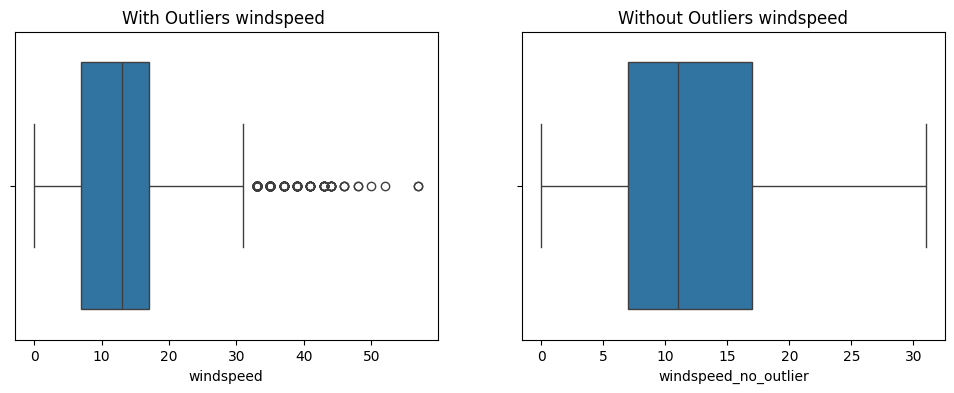

In [24]:
print('Displaying windspeed column with or without outliers')

fig,axis=plt.subplots(1,2,figsize=(12,4))
sns.boxplot(data=df,x=df['windspeed'],ax=axis[0])
axis[0].title.set_text('With Outliers windspeed ')
sns.boxplot(data=df,x=df['windspeed_no_outlier'],ax=axis[1])
axis[1].title.set_text('Without Outliers windspeed')
plt.show()

- In the above plot we can see the difference between with outlier plot and no-outlier plot.
- after we removed the outlier no outlier plot looks like this.

- In the above plot we can see that there is no outlier present after removing the outliers

**Find the outliers in count column**

In [25]:
#Calculate the quantile value for q1 and q3
q1=df['count'].quantile(0.25)
q3=df['count'].quantile(0.75)
IQR_count=q3-q1
print('IQR_count :',IQR_count)

#calculate lower bound and upper bound
lower_bound_count=q1-1.5*IQR_count
upper_bound_count=q3+1.5*IQR_count
print('lower_bound_count :',lower_bound_count)
print('upper_bound_count :',upper_bound_count)

#find the outlier values
outlier_count=df['count'][(df['count']<lower_bound_count) | (df['count']>upper_bound_count)]
print('Original count of Count column :',len(df['count']))
print('Total outliers in count column :',len(outlier_count))
print('Min value of outlier:',outlier_count.min())
print('Max value of outlier:',outlier_count.max())

#Removing the outlier and storing new values in count_no_outlier
df['count_no_outlier']=df['count'][(df['count']>=lower_bound_count )& (df['count']<=upper_bound_count)]


IQR_count : 242.0
lower_bound_count : -321.0
upper_bound_count : 647.0
Original count of Count column : 10886
Total outliers in count column : 300
Min value of outlier: 648
Max value of outlier: 977


Displaying count column with or without outliers


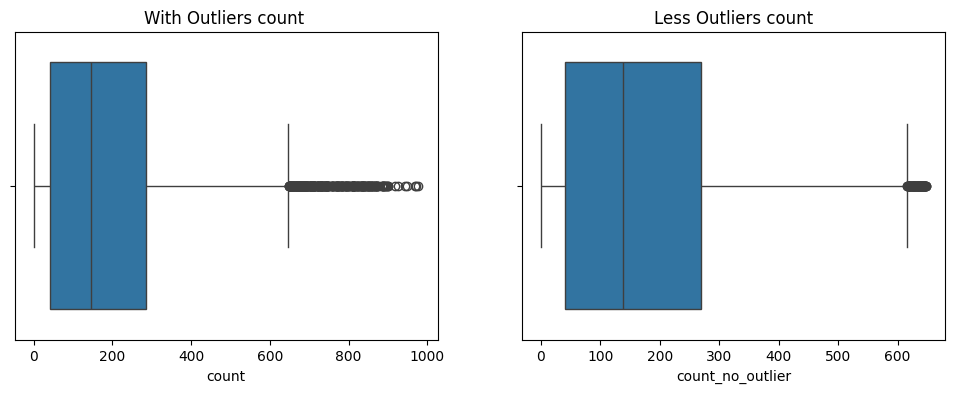

In [26]:
print('Displaying count column with or without outliers')
fig,axis=plt.subplots(1,2,figsize=(12,4))
sns.boxplot(data=df,x=df['count'],ax=axis[0])
axis[0].title.set_text('With Outliers count ')
sns.boxplot(data=df,x=df['count_no_outlier'],ax=axis[1])
axis[1].title.set_text('Less Outliers count')
plt.show()

- In the above plot we can see the difference between with outlier plot and no-outlier plot.
- after we removed the outlier no outlier plot looks like this.

**Finding and Removing outliers from Registered column**

In [27]:
#Calculate the quantile value for q1 and q3
q1=df['registered'].quantile(0.25)
q3=df['registered'].quantile(0.75)
IQR_registered=q3-q1
print('IQR_registered :',IQR_registered)

#calculate lower bound and upper bound
lower_bound_registered=q1-1.5*IQR_registered
upper_bound_registered=q3+1.5*IQR_registered
print('lower_bound_registered :',lower_bound_registered)
print('upper_bound_registered :',upper_bound_registered)

#find the outlier values
outlier_registered=df['registered'][(df['registered']<lower_bound_registered) | (df['registered']>upper_bound_registered)]
print('Original count of registered column :',len(df['registered']))
print('Total outliers in registered column :',len(outlier_registered))
print('Min value of outlier:',outlier_registered.min())
print('Max value of outlier:',outlier_registered.max())

#Removing the outlier and storing new values in count_no_outlier
df['registered_no_outlier']=df['registered'][(df['registered']>=lower_bound_registered )& (df['registered']<=upper_bound_registered)]


IQR_registered : 186.0
lower_bound_registered : -243.0
upper_bound_registered : 501.0
Original count of registered column : 10886
Total outliers in registered column : 423
Min value of outlier: 502
Max value of outlier: 886


Displaying registered column with or without outliers


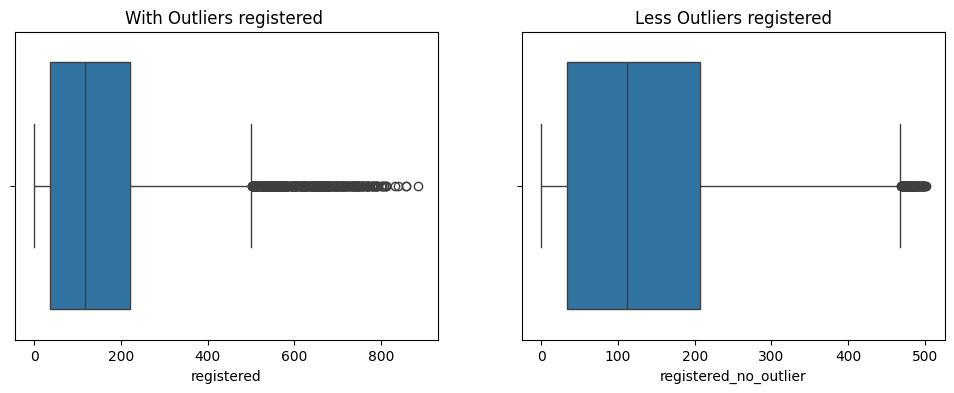

In [28]:
print('Displaying registered column with or without outliers')

fig,axis=plt.subplots(1,2,figsize=(12,4))
sns.boxplot(data=df,x=df['registered'],ax=axis[0])
axis[0].title.set_text('With Outliers registered ')
sns.boxplot(data=df,x=df['registered_no_outlier'],ax=axis[1])
axis[1].title.set_text('Less Outliers registered')
plt.show()


- In the above plot we can see the difference between with outlier plot and no-outlier plot.
- after we removed the outlier no outlier plot looks like this.

**Finding the correlationship between the columns**

In [29]:
round(df['temp'].corr(df['atemp']),2) # Positive correlation between temp and atemp column

0.98

* when correlation value of two column is nearest to 1 that mean both columns are strongly correlated with each other

In [30]:

corr_data=df[['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
corr_data.corr()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,1.000000,0.480021,0.010988,-0.003658,-0.005048,0.180986,0.181823,0.032856,-0.086888,0.172728,0.314879,0.310187
season,0.480021,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.010988,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.003658,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,-0.005048,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.180986,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.181823,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.032856,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.086888,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.172728,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414


- **Strong Correlation** means the corr value of two columns is >0.7.
- **Weak Correlation** means the corr value of two columns is <0.4.
- If correlation value of two columns is nearest to 0, that mean it is not correlated to each other.
- If correlation value of two columns is nearest to 1, that mean those are strongly correlated to each other.
- In the above table **workingday and datetime** column corr value is -0.003658 that mean both columns have **Weak Correlation**.
- The Columns count and registered has 0.97 corr value that mean both are strongly correlated with each other.


- We can display the co-relation of the two columns by using scatter plot.

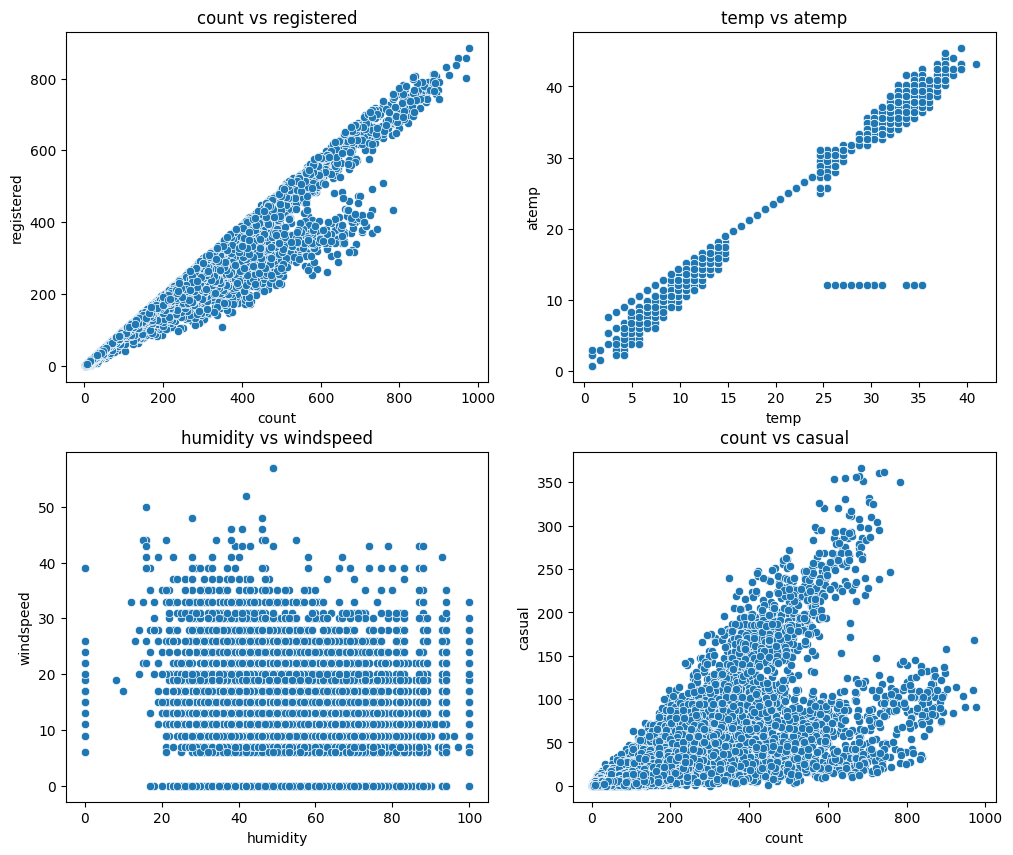

In [31]:
fig,axis=plt.subplots(2,2,figsize=(12,10))
sns.scatterplot(data=df,x=df['count'],y=df['registered'],ax=axis[0,0])
axis[0,0].title.set_text('count vs registered')
sns.scatterplot(data=df,x=df['temp'],y=df['atemp'],ax=axis[0,1])
axis[0,1].title.set_text('temp vs atemp')
sns.scatterplot(data=df,x=df['humidity'],y=df['windspeed'],ax=axis[1,0])
axis[1,0].title.set_text('humidity vs windspeed')
sns.scatterplot(data=df,x=df['count'],y=df['casual'],ax=axis[1,1])
axis[1,1].title.set_text('count vs casual')

plt.show()

- In above fist plot(**count vs registered**) we can see that when count values are increasing at the same time registred values are also increasing that mean both are strongly correlated to eac other.
- **temp and atemp** bothe columns also strongly correlated to each other.
- **count vs casula** both have moderate correlation to each other.
- **humidity vs windspeed** both are weakly correlated to each other.

**Displaying correlation in Heatmap**

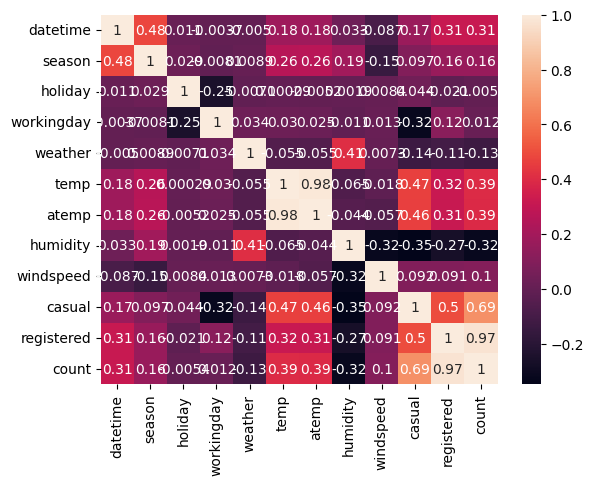

In [32]:
plot=sns.heatmap(data=corr_data.corr(),annot=True)
plt.show()

- In the above correlation map the strong correlation between two columns indicates in lighter(whitish color)
- Correlation map the weak correlation between two columns indicates in darkish(blackish color)


---

In [33]:
corr_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#2.Hypothesis Testing

## I. Check if there any significant difference between the no. of rented bike rides on Weekdays and Weekends

In [34]:
#Homogeneity of Variance
#The variances of the two groups being compared should be approximately equal. This assumption is called homogeneity of variance

levene_stat, p_value = stats.levene(df.loc[df['workingday'] == 1, 'count'], df.loc[df['workingday'] == 0, 'count'])

print(f"The p value is {p_value}")
if p_value < 0.05:
   print("Reject the Null hypothesis, Variances are not equal")
else:
   print("Fail to Reject the Null hypothesis, Variances of two groups are equal. T-Test can be performed")

The p value is 0.9437823280916695
Fail to Reject the Null hypothesis, Variances of two groups are equal. T-Test can be performed


In [35]:
#First find out the seperate data for bike rids on Weekdays and bike rids on Weekends
df_weekday=df[df['workingday']==1]
df_weekend=df[df['workingday']==0]
print("Population Size:",len(df_weekday['count']),'-',len(df_weekend['count']))


Population Size: 7412 - 3474


In [36]:
# Import the essensial librariies.
from scipy import stats

In [37]:
#STEP1.Define the Null Hypothesis(H0) and Alternative Hypothesis(Ha)
#H0: u1=u2 -->There is difference beween the number of bike rides on weekdays and weekend.
#Ha:u1!=u2-->There is no difference beween the number of bike rides on weekdays and weekend.


#As size is too large to perform sample t test, we will find out the  30 random samples
group1_sample=df_weekday['count'].sample(n=30,random_state=42)
group2_sample=df_weekend['count'].sample(n=30,random_state=42)
print("group1_sample size :",len(group1_sample),'-group2_sample size :',len(group2_sample))

#calculate statistics and P Value
stat,pvalue=stats.ttest_ind(a=group1_sample, b=group2_sample, equal_var=True)
alpha=0.05
print('stats:',stat,' pvalue:',pvalue)
if pvalue<alpha:
  print('Reject the Null Hypothesis : There is no difference beween the number of bike rides on weekdays and weekend.')
else:
  print('Accept the Null Hypothesis: There is difference beween the number of bike rides on weekdays and weekend')



group1_sample size : 30 -group2_sample size : 30
stats: 0.1790195390842205  pvalue: 0.8585462597309559
Accept the Null Hypothesis: There is difference beween the number of bike rides on weekdays and weekend


**Accept the Null Hypothesis: There is difference beween the number of bike rides on weekdays and weekend**

In [38]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season1,holiday1,humidity_no_outlier,windspeed_no_outlier,count_no_outlier,registered_no_outlier
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,spring,workingday,81.0,0.0,16.0,13.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,spring,workingday,80.0,0.0,40.0,32.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,spring,workingday,80.0,0.0,32.0,27.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,spring,workingday,75.0,0.0,13.0,10.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,spring,workingday,75.0,0.0,1.0,1.0


## II.ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season

* Check if the demand of bicycles on rent is the same for different Weather conditions?

- H0: The demand of bicycles on rent is the same for different Weather and conditions
- H1: The demand of bicycles on rent are not same for different Weather and conditions
- Signicance level=0.05


**Conditions for one way test**
1. Independence:-
    - The observations within each group must be independent of each other.   
    - This means that the individuals or items in one group should not be    
       related to those in another group.

  2.Normality:-
    - The data within each group should be approximately normally distributed.  If the sample sizes are large (typically n > 30), the ANOVA is considered
      robust to violations of normality due to the Central Limit Theorem.

  3 Homogeneity of Variance:-
    - The variances of the groups being compared should be approximately equal. This is known as homogeneity of variance.


Visualization of different types of weathers


In [62]:
weather1=df[df['weather']==1]['count']
weather2=df[df['weather']==2]['count']
weather3=df[df['weather']==3]['count']
weather4=df[df['weather']==4]['count']


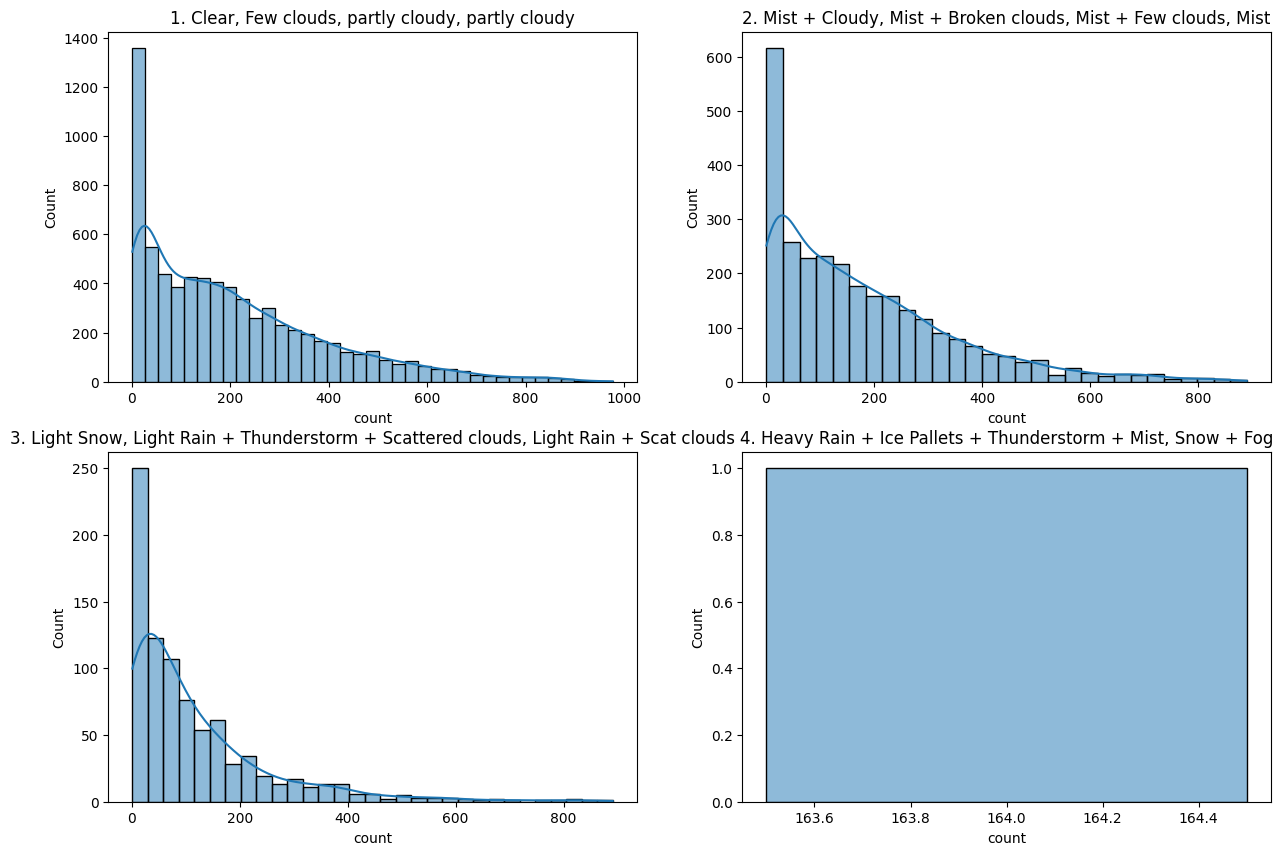

In [61]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(data=weather1,kde=True)
plt.title('1. Clear, Few clouds, partly cloudy, partly cloudy')
plt.subplot(2,2,2)
sns.histplot(data=weather2,kde=True)
plt.title('2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist')
plt.subplot(2,2,3)
sns.histplot(data=weather3,kde=True)
plt.title('3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scat clouds')
plt.subplot(2,2,4)
sns.histplot(data=weather4,kde=True)
plt.title('4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog')
plt.show()

**Visualization of different types of Seasons**

In [63]:
season_1=df[df['season1']=='spring']['count']
season_2=df[df['season1']=='summer']['count']
season_3=df[df['season1']=='fall']['count']
season_4=df[df['season1']=='winter']['count']

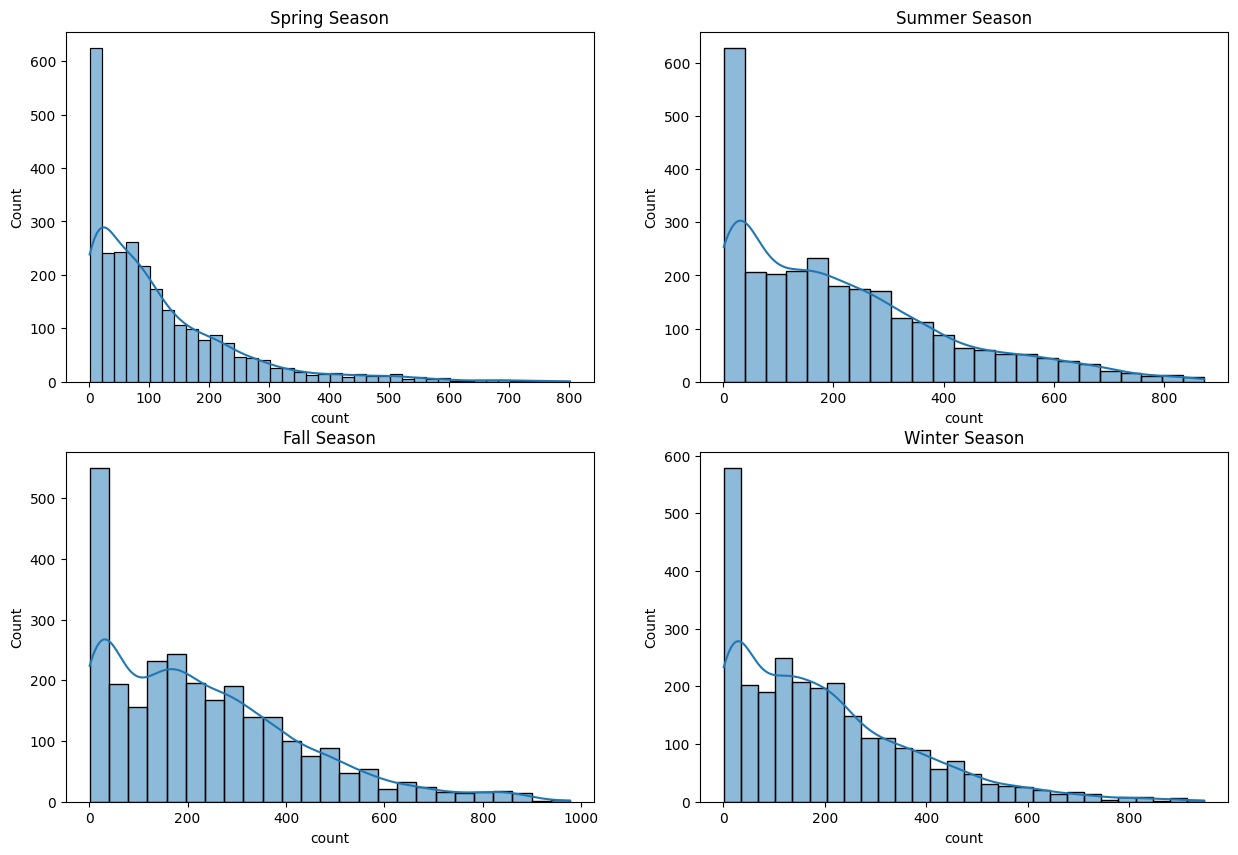

In [64]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(data=season_1,kde=True)
plt.title('Spring Season')
plt.subplot(2,2,2)
sns.histplot(data=season_2,kde=True)
plt.title('Summer Season')
plt.subplot(2,2,3)
sns.histplot(data=season_3,kde=True)
plt.title('Fall Season')
plt.subplot(2,2,4)
sns.histplot(data=season_4,kde=True)
plt.title('Winter Season')
plt.show()

**Conclusion :**
- This data visualization for different Weathers and Seasons shows that there is no normal distribution so we have to do further analysis by performing QQ Plot

**QQ Plot Test for checking normal distribution :**
   1. QQ Plot for Seasons

In [71]:
from statsmodels.graphics.gofplots import qqplot
df_season_spring1=df[df['season1']=='spring']['count']
df_season_summer1=df[df['season1']=='summer']['count']
df_season_fall1=df[df['season1']=='fall']['count']
df_season_winter1=df[df['season1']=='winter']['count']

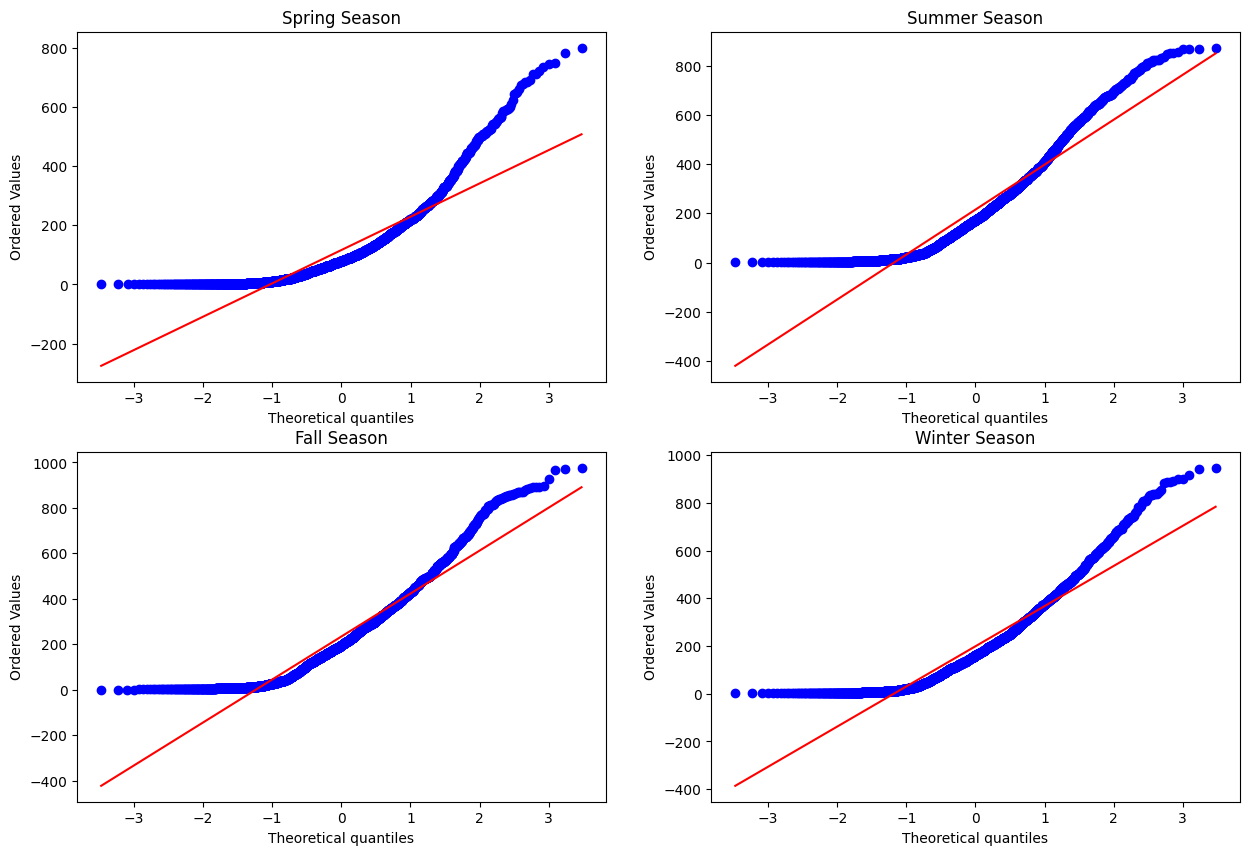

In [74]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
stats.probplot(df_season_spring1,plot=plt)
plt.title('Spring Season')
plt.subplot(2,2,2)
stats.probplot(df_season_summer1,plot=plt)
plt.title('Summer Season')
plt.subplot(2,2,3)
stats.probplot(df_season_fall1,plot=plt)
plt.title('Fall Season')
plt.subplot(2,2,4)
stats.probplot(df_season_winter1,plot=plt)
plt.title('Winter Season')
plt.show()

**QQ plot for weathers**

/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


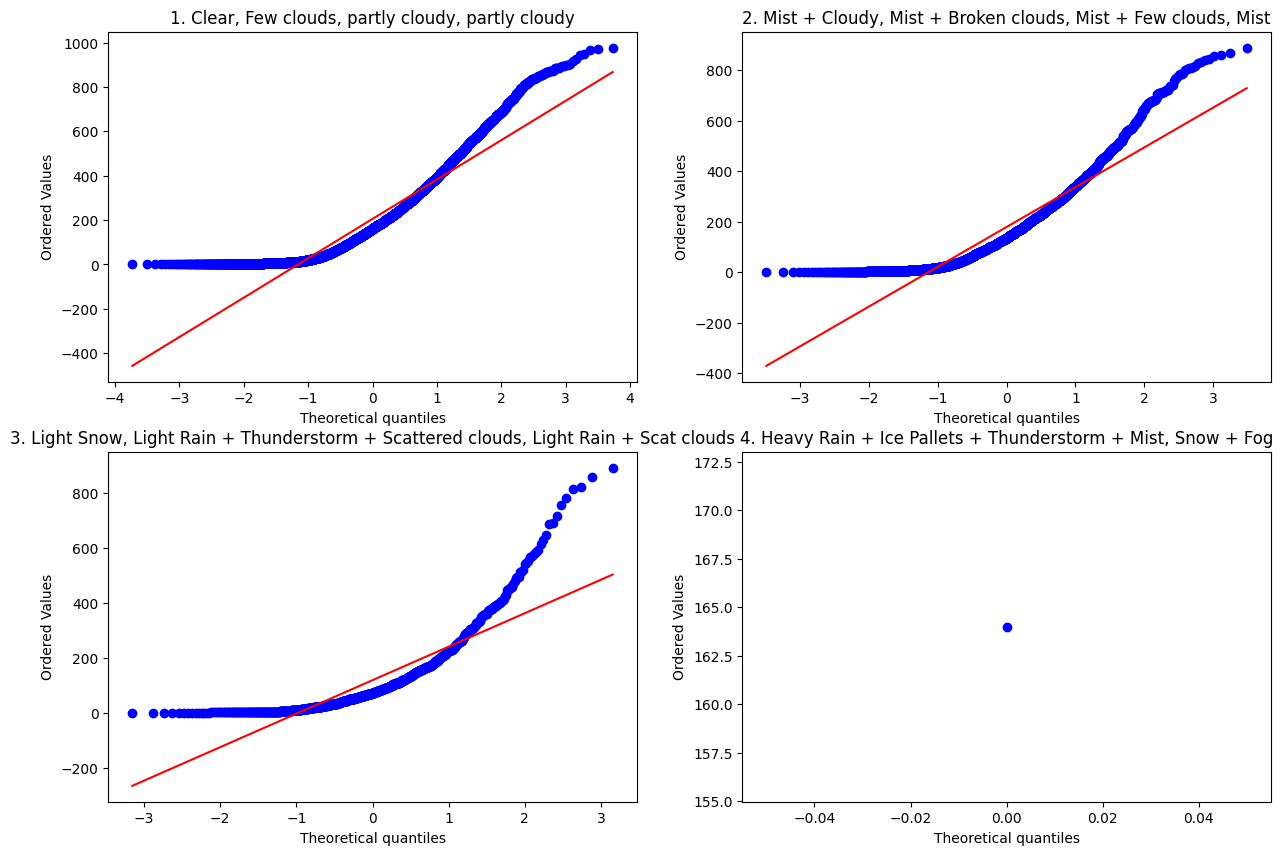

In [75]:
weather1=df[df['weather']==1]
weather2=df[df['weather']==2]
weather3=df[df['weather']==3]
weather4=df[df['weather']==4]

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
stats.probplot(weather1['count'],plot=plt)
plt.title('1. Clear, Few clouds, partly cloudy, partly cloudy')
plt.subplot(2,2,2)
stats.probplot(weather2['count'],plot=plt)
plt.title('2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist')
plt.subplot(2,2,3)
stats.probplot(weather3['count'],plot=plt)
plt.title('3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scat clouds')
plt.subplot(2,2,4)
stats.probplot(weather4['count'],plot=plt)
plt.title('4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog')
plt.show()

- **Shapiro's Test to check normal/Gaussain DistributionAfter plotting qq plot for season and weather, we can analyse that weather and season are not following the normal distributions so we need to perform the Shapiro's test to check the normal distributions.**

**Shapiro's Test to check normal/Gaussain Distribution**

1.**Shapiro's test for season**

 i.Shapiro's test for Spring Season.

In [76]:
test_stat,pvalue=stats.shapiro(df_season_spring1)
print('test_stat:',test_stat,' pvalue:',pvalue)
alpha=0.05
if pvalue<alpha:
  print('Reject the Null Hypothesis: The spring season data is not normally distributed')
else:
  print('Accept the Null Hypothesis: The spring season data is normally distributed')

test_stat: 0.8087378401253588  pvalue: 8.749584618867662e-49
Reject the Null Hypothesis: The spring season data is not normally distributed


ii.Shapiro's test for summer Season.

In [77]:
test_stat,pvalue=stats.shapiro(df_season_summer1)
print('test_stat:',test_stat,' pvalue:',pvalue)
alpha=0.05
if pvalue<alpha:
  print('Reject the Null Hypothesis: The summer season data is not normally distributed')
else:
  print('Accept the Null Hypothesis: The summer season data is normally distributed')


test_stat: 0.9004818080893252  pvalue: 6.039374406270491e-39
Reject the Null Hypothesis: The summer season data is not normally distributed


iii.Shapiro's test for fall Season.

In [78]:
test_stat,pvalue=stats.shapiro(df_season_fall1)
print('test_stat:',test_stat,' pvalue:',pvalue)
alpha=0.05
if pvalue<alpha:
  print('Reject the Null Hypothesis: The fall season data is not normally distributed')
else:
  print('Accept the Null Hypothesis: The fall season data is normally distributed')

test_stat: 0.9148166372899196  pvalue: 1.043680518918597e-36
Reject the Null Hypothesis: The fall season data is not normally distributed


iv.Shapiro's test for Winter Season.

In [79]:
test_stat,pvalue=stats.shapiro(df_season_winter1)
print('test_stat:',test_stat,' pvalue:',pvalue)
alpha=0.05
if pvalue<alpha:
  print('Reject the Null Hypothesis: The winter season data is not normally distributed')
else:
  print('Accept the Null Hypothesis: The winter season data is normally distributed')

test_stat: 0.8954637482095505  pvalue: 1.1299244409282836e-39
Reject the Null Hypothesis: The winter season data is not normally distributed


**2. Shapiro's Test for Winters**

  - i. Shapiro's Test for Winter Category 1

In [80]:
tstat,pvalue=stats.shapiro(weather1['count'])
print('test_stat:',test_stat,' pvalue:',pvalue)
alpha=0.05
if pvalue<alpha:
  print('Reject the Null Hypothesis: The weather1 data is not normally distributed')
else:
  print('Accept the Null Hypothesis: The weather1 data is normally distributed')

test_stat: 0.8954637482095505  pvalue: 1.5964921477006555e-57
Reject the Null Hypothesis: The weather1 data is not normally distributed


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7192.
  res = hypotest_fun_out(*samples, **kwds)


   - ii. Shapiro's Test for Winter Category 2

In [81]:
tstat,pvalue=stats.shapiro(weather2['count'])
print('test_stat:',test_stat,' pvalue:',pvalue)
alpha=0.05
if pvalue<alpha:
  print('Reject the Null Hypothesis: The weather2 data is not normally distributed')
else:
  print('Accept the Null Hypothesis: The weather2 data is normally distributed')

test_stat: 0.8954637482095505  pvalue: 9.777839106111785e-43
Reject the Null Hypothesis: The weather2 data is not normally distributed


     iii. Shapiro's Test for Winter Category 3

In [82]:
tstat,pvalue=stats.shapiro(weather3['count'])
print('test_stat:',test_stat,' pvalue:',pvalue)
alpha=0.05
if pvalue<alpha:
  print('Reject the Null Hypothesis: The weather3 data is not normally distributed')
else:
  print('Accept the Null Hypothesis: The weather3 data is normally distributed')

test_stat: 0.8954637482095505  pvalue: 3.875893017396149e-33
Reject the Null Hypothesis: The weather3 data is not normally distributed


 iv. Shapiro's Test for Winter Category 4

In [89]:
weather4_data_count=weather4.count()
print('data for weather 4 category is :', weather4_data_count)
tstat,pvalue=stats.shapiro(weather4_data_count)
print('test_stat:',test_stat,' pvalue:',pvalue)

data for weather 4 category is : datetime                 1
season                   1
holiday                  1
workingday               1
weather                  1
temp                     1
atemp                    1
humidity                 1
windspeed                1
casual                   1
registered               1
count                    1
season1                  1
holiday1                 1
humidity_no_outlier      1
windspeed_no_outlier     1
count_no_outlier         1
registered_no_outlier    1
dtype: int64
test_stat: 0.8954637482095505  pvalue: 1.0


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


**Note:** Since there is only one record for weather category 4 so cannot perform Shapiro's test on it.


**Conclusion:** The results of the Shapiro's test suggest that the distributions of weather and seasons deviate from the normal distribution.

**Perform Levene test for checking homogeneity of variance:**

* Null Hypothesis (H0) = Variances of two groups are same.
* Alternative Hypothesis (HA) = Variances of two groups are different

In [90]:
levenstate, pvalue=stats.levene(weather1['count'],weather2['count'],weather3['count'],weather4['count'],df_season_spring1,df_season_summer1,df_season_fall1,df_season_winter1)
print('levenstate:',levenstate,' pvalue:',pvalue)
alpha=0.05
if pvalue<alpha:
  print('Reject the Null Hypothesis: Variances of two groups are not same')
else:
  print('Accept the Null Hypothesis: Variances of two groups are same')

levenstate: 102.5026306304148  pvalue: 3.463531888897594e-148
Reject the Null Hypothesis: Variances of two groups are not same


**Conclusion:**Since QQ Test, Shapiro's Test as well as Levene's Test has been failed so we cannot perform Anova Test. But as an alternative we can perform kruskal test

**Krushkal Test for Weathers**

In [91]:
krushkal_stat,pvalue=stats.kruskal(weather1['count'],weather2['count'],weather3['count'],weather4['count'])
print('krushkal_stat:',krushkal_stat,' pvalue:',pvalue)
alpha=0.05
if pvalue<alpha:
  print('Reject the Null Hypothesis: There is no difference beween the number of bike rides on weekdays and weekend.')
else:
  print('Failed to reject the Null Hypothesis: There is a difference beween the number of bike rides on weekdays and weekend.')

krushkal_stat: 205.00216514479087  pvalue: 3.501611300708679e-44
Reject the Null Hypothesis: There is no difference beween the number of bike rides on weekdays and weekend.


**Krushkal Test for season**

In [92]:
krishkal_stat,pvalue=stats.kruskal(df_season_spring1,df_season_summer1,df_season_fall1,df_season_winter1)
print('krishkal_stat:',krishkal_stat,' pvalue:',pvalue)
alpha=0.05
if pvalue<alpha:
  print('Reject the Null Hypothesis: We reject the null hypothesis. This suggests that the rental count varies across different seasonal conditions."')
else:
  print('We failed to reject the null hypothesis. This suggests that the rental count are not varies across different seasonal conditions.')



krishkal_stat: 699.6668548181988  pvalue: 2.479008372608633e-151
Reject the Null Hypothesis: We reject the null hypothesis. This suggests that the rental count varies across different seasonal conditions."


**Conclusion:**
* From krushkal test it can be cocluded that the count of rented bikes across different weather and seasons.

---

## III. Chi-square test to check if Weather is dependent on the season

In [96]:
df[['season','weather']].describe()


,season,weather
count,10886.000000,10886.000000
mean,2.506614,1.418427
std,1.116174,0.633839
min,1.000000,1.000000
25%,2.000000,1.000000
50%,3.000000,1.000000
75%,4.000000,2.000000
max,4.000000,4.000000


- Before calculate the chi quare test, we need to prepare the data for the same.
- First we will create contengency table.


In [98]:
contengency_data=pd.crosstab(df['season1'],df['weather'])
contengency_data

weather,1,2,3,4
season1,,,,
fall,1930,604,199,0
spring,1759,715,211,1
summer,1801,708,224,0
winter,1702,807,225,0


**Null Hypothesis( H0 ):** weather is independent of the seasons.

**Alternate Hypothesis ( HA ):** weather is dependent on the seasons.

- lets assume significance value is 0.05


In [101]:
# importing essential library for chi quare test
from  scipy.stats.contingency import chi2_contingency

contingency_table=pd.crosstab(df['season'],df['weather'])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0


In [109]:
#we need to convert the table data into values
values=contingency_table.to_numpy()

#find the pvalue

statistics=chi2_contingency(values)
print('statistics:',statistics.pvalue)
alpha=0.05
if pvalue<alpha:
  print('Reject the Null Hypothesis: weather is dependent on the seasons')
else:
  print('Accept the Null Hypothesis: weather is independent of the seasons')

statistics: 1.549925073686492e-07
Reject the Null Hypothesis: weather is dependent on the seasons


- Conclusion:
  - Chi=Square indicate a significant dependency beween weather conditions and season.

Based on the yulu data analysis we can recommend that,

Insights

1.Seasonal :–
   - A clear seasonal pattern is observed in bike rentals, with higher demand during spring and summer,
     a slight decline in fall, and a further decrease in winter.
   -This insight can guide seasonal marketing and resource allocation.

2.Monthly Trends:–
  - The lowest average hourly count of rental bikes occurs in January, followed by February and March.
  -  This information can inform inventory management and resource optimization during low-demand months.

3.Weather Impact:–
 - Rental bike counts are highest in clear and cloudy weather, followed by misty weather and rainy weather.
 - Limited records for extreme weather suggest potential unmet demand during such conditions.4

4.Working day vs. Holidays:–
 - The mean hourly count of rental bikes is statistically similar for both working and non-working days.
 - This suggests a consistent demand pattern regardless of the day of the week.





Recommendations:

1. Seasonal Marketing:–
- Yulu should focus on promoting bike rentals during the spring and summer months.
- Offer seasonal discounts or special packages during peak demand seasons.

2. Time-based Pricing:–
- Implement time-based pricing to optimize rates throughout the day.
- Encourage off-peak rentals by offering lower rates during less busy hours.

3. Weather-based Promotions:–
- Create promotions targeting clear and cloudy weather, which show the highest rental counts.
- Offer weather-specific discounts to attract customers during favorable conditions